# 20221206.1090312.1090425#ExpRV

## A組 1090312侯智偉  1090425李慶庭

Use Julia program to simulate 10^2, 10^3, 10^5 random numbers with Exp(λ=0.5) and Exp(λ=1.5) random variables, repectively; and plot their histograms.

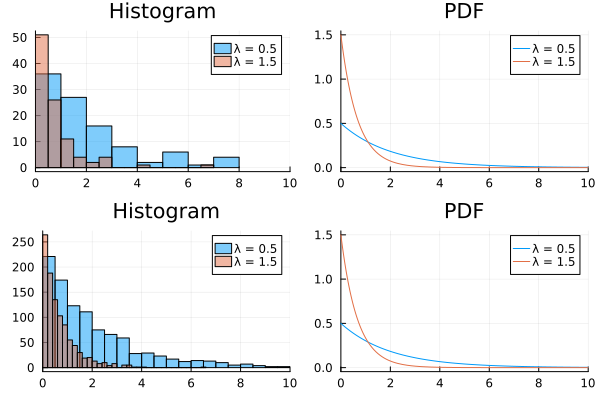

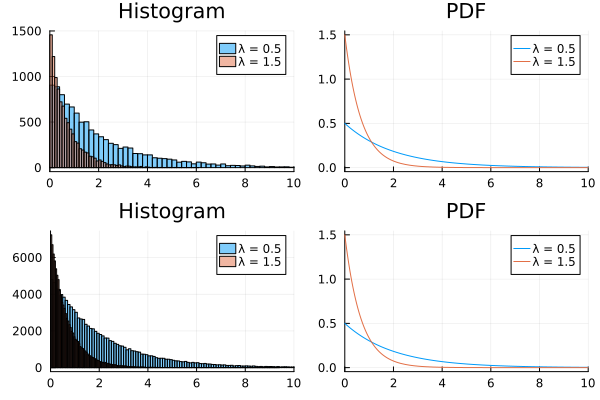

In [1]:
using Random, Plots, Distributions
# Random 機率模組
# Plots 繪圖模組
# Distributions統計分布模組

rng = MersenneTwister(9)
# 固定隨機種子碼

function f1(n, λ1, λ2)
    x = rand(rng, Exponential(1/λ1), n)
    y = rand(rng, Exponential(1/λ2), n)
    # 依照指數分布的機率隨機抽取數值
    
    res1 = histogram(x, color=1, label=string("λ = ", λ1), xlims=(0,10), fillalpha = 0.5, title="Histogram")
    histogram!(y, color=2, fillalpha = 0.5, label=string("λ = ", λ2))
    # 將抽取到的x, y繪製成histogram，並疊在一起比較。
    
    res2 = plot(a -> pdf(Exponential(1/0.5), a), color=1, label="λ = 0.5", xlims=(0,10), title="PDF")
    plot!(b -> pdf(Exponential(1/1.5), b), color=2, label="λ = 1.5")
    # 將兩種不同λ的指數分布繪製成曲線圖，並疊在一起比較。
    
    chart = plot(res1, res2, layout= (1, 2))
    # 將histogram和指數分布曲線圖放在一起，觀察兩邊的趨勢。
    
    return chart
end

display(plot(f1(10^2, 0.5, 1.5), f1(10^3, 0.5, 1.5), layout=(2,1)))
display(plot(f1(10^4, 0.5, 1.5), f1(10^5, 0.5, 1.5), layout=(2,1)))

# for i in (2:5) 
#     display(f1(10^i, 0.5, 1.5))
# end

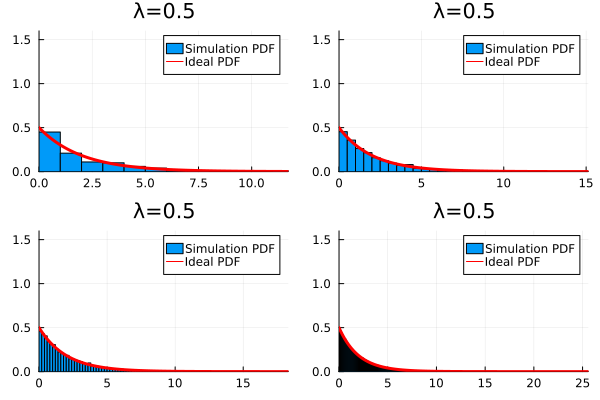

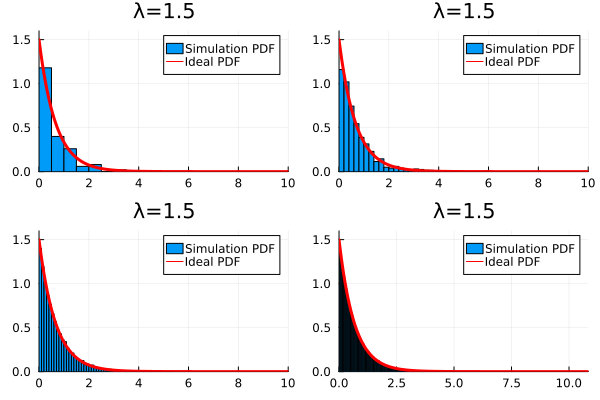

In [2]:
function f2(λ, N) 
    
    sample = rand(rng, Exponential(1/λ), N)
    p = histogram(sample, label="Simulation PDF", normalize=:pdf)
    # 依照指數分布的機率隨機抽取數值
    
    max = 10                                             
    if maximum(sample) > max                               
        max = maximum(sample)
    end
    #由於理論值的指數分布在X=10左右已趨近於零，因此將x軸的長度設定成10
    #若取樣出的隨機亂數大於10則以最大的隨機亂數大小作為x軸的長度    
    
    x = 0:0.01:max                                         
    #在x=0到10中以0.01間隔進行取樣
    
    str = string("λ=", string(λ))
    p = plot!(x, pdf.(Exponential(1/λ), x), label="Ideal PDF", lw=3, c=:red, xlims=(0, max), ylims=(0, 1.6), title=str)
    #在圖上顯示用pdf畫出的機率分佈曲線
    
    return p
end

display(plot(f2(0.5, 10^2), f2(0.5, 10^3), f2(0.5, 10^4), f2(0.5, 10^5)))
display(plot(f2(1.5, 10^2), f2(1.5, 10^3), f2(1.5, 10^4), f2(1.5, 10^5)))

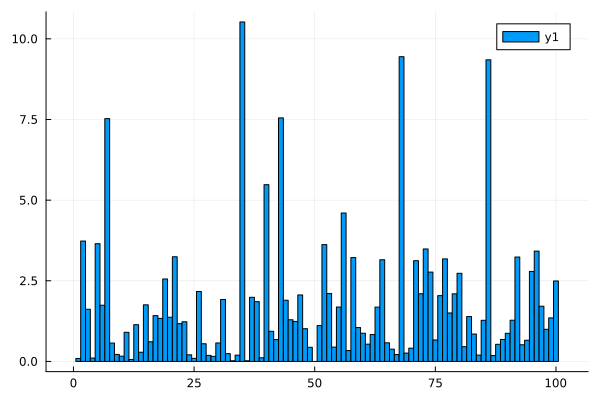

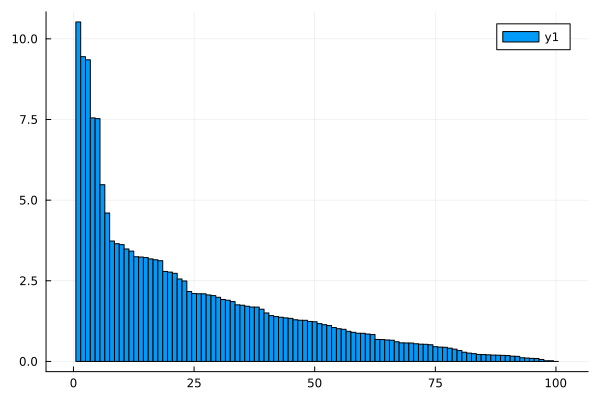

In [3]:
res = rand(Exponential(1/0.5), 100)
# println(res)

display(bar(res, bar_width=1))
display(bar(sort(res, rev=true), bar_width=1))
# display(plot(bar(res, bar_width=1), bar(sort(res, rev=true), bar_width=1)))